In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
from our_mpeg import load

In [7]:
example = load("/home/sidor/Dropbox/light_filed_video/bottle.zip")

In [8]:
im1 = example[0,0,0,:,:]
im2 = example[1,0,0,:,:]

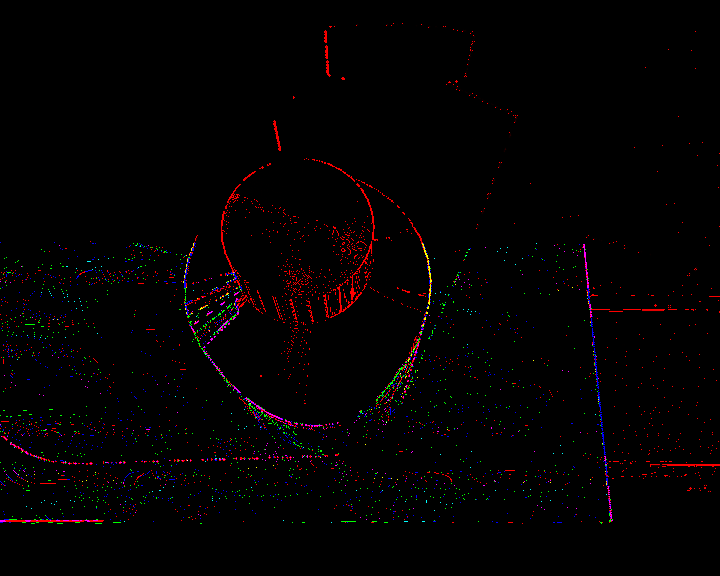

In [9]:
Image.fromarray(im1 - im2)

In [10]:
from our_mpeg import break_blocks, merge_blocks

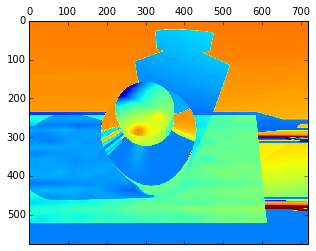

In [11]:
plt.matshow(im1[:,:,0])

0.0


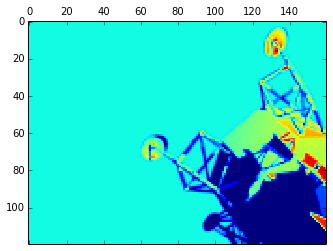

In [12]:
bb = break_blocks(im1)
im1_recovered = merge_blocks(bb)
plt.matshow(im1_recovered[:,:,0])
print(np.linalg.norm(im1_recovered - im1))

In [13]:
from our_mpeg import compute_reference, apply_reference
from our_mpeg import transform, inverse_transform
from our_mpeg import quantize, dequantize

In [14]:
im1_blocks = break_blocks(im1)
im1_ref    = compute_reference(im1_blocks, im2)
im1_res = [[im1_ref[x][y][1] for y in range(0, len(im1_ref[x]))] for x in range(0, len(im1_ref))]
im1_res_trans = transform(im1_res)
im1_res_q = quantize_inter(im1_res_trans)

In [20]:
im1_res_dq = dequantize_inter(im1_res_q)
print(np.linalg.norm(np.array(im1_res_trans) - np.array(im1_res_dq)))
im1_res_inv_trans = inverse_transform(im1_res_dq)
im1_ref_recovered = [[(im1_ref[x][y][0],im1_res_inv_trans[x][y]) for y in range(0, len(im1_res_inv_trans[x]))] for x in range(0, len(im1_res_inv_trans))]
im1_blocks_recovered = apply_reference(im1_ref_recovered, im2)
im1_recovered = merge_blocks(im1_blocks_recovered)

145096.0


523.404241481


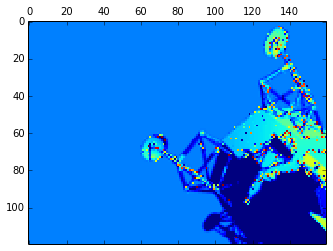

In [16]:
plt.matshow(im1_recovered[:,:,0])
print(np.linalg.norm(im1_recovered - im1))